In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

class DatasetHolder:
    def __init__(self, X_train, y_train, X_dev, y_dev, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        
        self.X_dev = X_dev
        self.y_dev = y_dev
        
        self.X_test = X_test
        self.y_test = y_test

def split_simple(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    
    return DatasetHolder(X_train, y_train, X_dev, y_dev, X_test, y_test)

def load_csv(path):
    return pd.read_csv(path)

def load_dataset(path):
    print(f"Loading dataset from {path}...")
    df = load_csv(path)
    X_full, y_full = df.drop('next_time_in_hospital', axis=1).values, df['next_time_in_hospital'].values
    print(f"Shape of dataset: {X_full.shape}")
    
    return split_simple(X_full, y_full)

In [4]:
simple = load_dataset("nn_allcats_ds.csv")

Loading dataset from nn_allcats_ds.csv...
Shape of dataset: (30248, 1903)


In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_tweedie_deviance
import time

def train_model_for_seconds(dataset, model, seconds=10, batch_size=None):
    start_time = time.time()
    # your code
    
    epochs = 0
    loss_hist = []
    val_loss_hist = []
    
    while time.time() - start_time < seconds:
        cur = model.fit(dataset.X_train, dataset.y_train, batch_size=batch_size, epochs=1, 
                        validation_data=(dataset.X_dev, dataset.y_dev))
        
        for el in cur.history['loss']:
            loss_hist.append(el)
        
        for el in cur.history['val_loss']:
            val_loss_hist.append(el)
        
        epochs += 1
    
    elapsed = time.time() - start_time
    print(f"Trained model on {epochs} epochs for time {elapsed} secs ({epochs/elapsed} epochs in second)")
    
    print("Loss history:")
    plt.plot(range(len(loss_hist)), loss_hist, label='loss')
    plt.plot(range(len(val_loss_hist)), val_loss_hist, label='val_loss')
    plt.show()

def eval_model(dataset, model, batch_size=None):
    train_model_for_seconds(dataset, model, batch_size=batch_size)
    predictions = model.predict(dataset.X_dev)
    ret = f"mean squared error: {mean_squared_error(dataset.y_dev, predictions)}"# , poisson: {mean_tweedie_deviance(dataset.y_dev, predictions, power=1)}"
    
#     diffs = dataset.y_dev - predictions[:, 0]
#     plt.hist(diffs)
    
    return ret

In [6]:
def get_perceptron_m(dataset):
    perceptron_m = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(dataset.X_train.shape[1],))
    ])
    perceptron_m.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error')
    
    return perceptron_m

perceptron_m = get_perceptron_m(simple)

In [7]:
def get_two_layer_m(dataset):
    two_layer_m = tf.keras.Sequential([
        tf.keras.layers.Dense(simple.X_train.shape[1], input_shape=(dataset.X_train.shape[1],), activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    two_layer_m.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error')
    
    return two_layer_m

two_layer_m = get_two_layer_m(simple)

In [8]:
def get_three_layer_m(dataset):
    three_layer_m = tf.keras.Sequential([
        tf.keras.layers.Dense(simple.X_train.shape[1], input_shape=(dataset.X_train.shape[1],), activation='relu'),
        tf.keras.layers.Dense(simple.X_train.shape[1], activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    three_layer_m.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error')
    
    return three_layer_m

three_layer_m = get_three_layer_m(simple)

In [9]:
def get_four_layer_m(dataset):
    four_layer_m = tf.keras.Sequential([
        tf.keras.layers.Dense(simple.X_train.shape[1], input_shape=(dataset.X_train.shape[1],), activation='relu'),
        tf.keras.layers.Dense(simple.X_train.shape[1], activation='relu'),
        tf.keras.layers.Dense(simple.X_train.shape[1], activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    four_layer_m.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error')
    
    return four_layer_m

four_layer_m = get_four_layer_m(simple)

In [10]:
def get_expdec_four_layer_m(dataset):
    expdec_four_layer_m = tf.keras.Sequential([
        tf.keras.layers.Dense(simple.X_train.shape[1], input_shape=(dataset.X_train.shape[1],), activation='relu'),
        tf.keras.layers.Dense(simple.X_train.shape[1]**(1/2), activation='relu'),
        tf.keras.layers.Dense(simple.X_train.shape[1]**(1/4), activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    expdec_four_layer_m.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error')
    
    return expdec_four_layer_m

expdec_four_layer_m = get_expdec_four_layer_m(simple)

In [11]:
def get_expdec_three_layer_m(dataset):
    expdec_three_layer_m = tf.keras.Sequential([
        tf.keras.layers.Dense(simple.X_train.shape[1], input_shape=(dataset.X_train.shape[1],), activation='relu'),
        tf.keras.layers.Dense(simple.X_train.shape[1]**(1/2), activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    expdec_three_layer_m.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error')
    
    return expdec_three_layer_m

expdec_three_layer_m = get_expdec_three_layer_m(simple)

In [12]:
def get_expdec_smallstart_three_layer_m(dataset):
    expdec_smallstart_three_layer_m = tf.keras.Sequential([
        tf.keras.layers.Dense(simple.X_train.shape[1]**(1/4), input_shape=(dataset.X_train.shape[1],), activation='relu'),
        tf.keras.layers.Dense(simple.X_train.shape[1]**(1/8), activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    expdec_smallstart_three_layer_m.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error')
    
    return expdec_smallstart_three_layer_m

expdec_smallstart_three_layer_m = get_expdec_smallstart_three_layer_m(simple)

In [13]:
eval_model(simple, get_perceptron_m(simple), batch_size=simple.X_train.shape[0])

Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 1s 32us/sample - loss: 3.0747 - val_loss: 3.0379
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 16us/sample - loss: 2.9574 - val_loss: 2.9578
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 9us/sample - loss: 2.8447 - val_loss: 2.8814
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 11us/sample - loss: 2.7366 - val_loss: 2.8083
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 9us/sample - loss: 2.6330 - val_loss: 2.7387
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 9us/sample - loss: 2.5339 - val_loss: 2.6722
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 15us/sample - loss: 2.4392 - val_l

KeyboardInterrupt: 

In [ ]:
eval_model(simple, two_layer_m)

In [ ]:
eval_model(simple, four_layer_m)

In [ ]:
eval_model(simple, expdec_four_layer_m)

In [ ]:
eval_model(simple, expdec_three_layer_m)

In [ ]:
eval_model(simple, expdec_smallstart_three_layer_m) # Big overfit

I tried straightforward testing on this dataset, including
* A single perceptron
* Densely connected 2 full-width layers
* Densely connected 4 full-width layers (overfits)
* Densely connected 4 layers with exponentially decreasing witdth
* Densely connected 3 layers -=-
* Densely connected 3 lyaers with exponentially decreasing width, but starting from smaller width in general

Those were only tried with ReLu activation function.

Learning rates turned out to be very important, so I switched from SGD to Adam optimizer, which uses an adaptive learning rate.

Turns out that models with smaller numer of units perform better (but too little become prone to overfitting)

A thing to try would be to better engineer features, so we have smaller number

In [ ]:
compdiags = load_dataset("nn_compdiags_ds.csv")

In [ ]:
eval_model(compdiags, get_perceptron_m(compdiags), batch_size=compdiags.X_train.shape[0])

In [ ]:
eval_model(compdiags, get_two_layer_m(compdiags))

In [ ]:
eval_model(compdiags, get_four_layer_m(compdiags))

In [ ]:
eval_model(compdiags, get_expdec_four_layer_m(compdiags))

In [ ]:
eval_model(compdiags, get_expdec_three_layer_m(compdiags))

In [ ]:
eval_model(compdiags, get_expdec_smallstart_three_layer_m(compdiags))

In [15]:
unscaled = load_dataset("nn_compdiags_unscaled_ds.csv")

Loading dataset from nn_compdiags_unscaled_ds.csv...
Shape of dataset: (30248, 244)


Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 9us/sample - loss: 32.8655 - val_loss: 33.2715
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 2us/sample - loss: 32.8059 - val_loss: 33.2257
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 2us/sample - loss: 32.7469 - val_loss: 33.1808
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 2us/sample - loss: 32.6887 - val_loss: 33.1365
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 3us/sample - loss: 32.6311 - val_loss: 33.0929
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 2us/sample - loss: 32.5742 - val_loss: 33.0498
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 2us/sample - loss: 32.517

Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 2us/sample - loss: 30.4459 - val_loss: 31.5643
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 3us/sample - loss: 30.4179 - val_loss: 31.5476
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 2us/sample - loss: 30.3901 - val_loss: 31.5313
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 2us/sample - loss: 30.3627 - val_loss: 31.5153
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 2us/sample - loss: 30.3356 - val_loss: 31.4996
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 2us/sample - loss: 30.3089 - val_loss: 31.4843
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 0s 2us/sample - loss: 30.282

'mean squared error: 31.12052517075079'

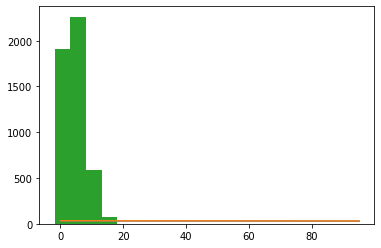

In [24]:
eval_model(unscaled, get_perceptron_m(unscaled), batch_size=unscaled.X_train.shape[0])

Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 3s 163us/sample - loss: 10.3204 - val_loss: 11.0353
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 3s 154us/sample - loss: 9.2846 - val_loss: 15.1437
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 3s 154us/sample - loss: 8.9928 - val_loss: 9.3046
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 3s 157us/sample - loss: 8.5999 - val_loss: 10.8023
Trained model on 4 epochs for time 12.394458770751953 secs (0.3227248622940335 epochs in second)
Loss history:


'mean squared error: 10.802309365041085'

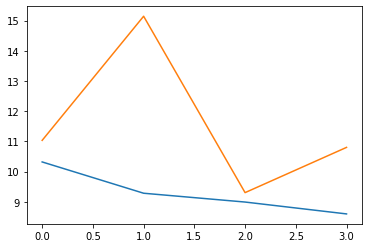

In [26]:
eval_model(unscaled, get_two_layer_m(unscaled))


In [ ]:
eval_model(unscaled, get_four_layer_m(unscaled))

In [ ]:
eval_model(unscaled, get_expdec_three_layer_m(unscaled))

In [ ]:
eval_model(unscaled, get_expdec_three_layer_m(unscaled), batch_size=unscaled.X_train.shape[0])

In [ ]:
eval_model(unscaled, get_expdec_three_layer_m(unscaled), batch_size=64)

Trying another model ...

In [ ]:
eval_model(unscaled, get_three_layer_m(unscaled), batch_size=unscaled.X_test.shape[0])

In [ ]:
eval_model(unscaled, get_three_layer_m(unscaled), batch_size=32)

In [ ]:
eval_model(unscaled, get_three_layer_m(unscaled), batch_size=64)

## Poisson stuff

In [ ]:
def tf_fact(tensor):
    return tf.exp(tf.math.lgamma(tensor + 1.))

In [ ]:
from scipy.stats import poisson

def my_poisson_loss(y_actual, y_predicted):
    lmbd = tf.keras.backend.cast(y_predicted, tf.keras.backend.floatx())
    k = tf.keras.backend.cast(y_actual, tf.keras.backend.floatx())
    return lmbd - k*tf.math.log(1 + lmbd)

def get_my_poisson_twol_m(dataset):
    my_poisson_twol_m = tf.keras.Sequential([
        tf.keras.layers.Dense(simple.X_train.shape[1], input_shape=(dataset.X_train.shape[1],), activation='relu'),
        tf.keras.layers.Dense(1, activation='relu')
    ])
    my_poisson_twol_m.compile(optimizer=tf.keras.optimizers.Adam(), loss=my_poisson_loss)
    
    return my_poisson_twol_m

def get_poisson_twol_m(dataset):
    poisson_twol_m = tf.keras.Sequential([
        tf.keras.layers.Dense(simple.X_train.shape[1], input_shape=(dataset.X_train.shape[1],), activation='relu'),
        tf.keras.layers.Dense(1, activation='relu')
    ])
    poisson_twol_m.compile(optimizer=tf.keras.optimizers.Adam(), loss='poisson')
    
    return poisson_twol_m

def get_poisson_expdec_threel_m(dataset):
    poisson_expdec_threel_m = tf.keras.Sequential([
        tf.keras.layers.Dense(simple.X_train.shape[1], input_shape=(dataset.X_train.shape[1],), activation='relu'),
        tf.keras.layers.Dense(simple.X_train.shape[1]**(1/2), activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    poisson_expdec_threel_m.compile(optimizer=tf.keras.optimizers.Adam(), loss='poisson')
    
    return poisson_expdec_threel_m

def get_my_poisson_expdec_threel_m(dataset):
    my_poisson_expdec_threel_m = tf.keras.Sequential([
        tf.keras.layers.Dense(simple.X_train.shape[1], input_shape=(dataset.X_train.shape[1],), activation='relu'),
        tf.keras.layers.Dense(simple.X_train.shape[1]**(1/2), activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    my_poisson_expdec_threel_m.compile(optimizer=tf.keras.optimizers.Adam(), loss=my_poisson_loss)
    
    return my_poisson_expdec_threel_m

In [ ]:
eval_model(unscaled, get_poisson_twol_m(unscaled), batch_size=unscaled.X_test.shape[0])

In [ ]:
eval_model(unscaled, get_poisson_expdec_threel_m(unscaled))

In [ ]:
eval_model(unscaled, get_poisson_expdec_threel_m(unscaled), batch_size=32)

## Scaled on poisson

In [ ]:
eval_model(compdiags, get_poisson_expdec_threel_m(compdiags), batch_size=compdiags.X_train.shape[0])

## My custom poisson

In [ ]:
eval_model(unscaled, get_my_poisson_twol_m(unscaled))

In [ ]:
eval_model(unscaled, get_poisson_twol_m(unscaled))

## Plotting noise in labels

In [32]:
def get_custom_twol_m(dataset, loss):
    poisson_twol_m = tf.keras.Sequential([
        tf.keras.layers.Dense(simple.X_train.shape[1], input_shape=(dataset.X_train.shape[1],), activation='relu'),
        tf.keras.layers.Dense(1, activation='relu')
    ])
    poisson_twol_m.compile(optimizer=tf.keras.optimizers.Adam(), loss=loss)
    
    return poisson_twol_m

In [68]:
def get_diffs_distr(df, model, axis, loss):
    last = 2**20
    while True:
        cur = model.fit(df.X_train, df.y_train,  
                        validation_data=(df.X_dev, df.y_dev)).history['val_loss']
        print(f"Last loss: {last}, cur loss: {cur}")
        if cur[0] > last:
            print("Stopping...")
            break
        
        last = cur
    
    preds = model.predict(df.X_dev)
    difs = preds[:, 0] - df.y_dev
    
    axis.set_title(loss)
    axis.hist(difs, bins = 40, range=(-20, 20))
#     plt.plot()
    
    return difs

Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 3s 178us/sample - loss: 9.8943 - val_loss: 9.6259
Last loss: 1048576, cur loss: [9.62594566660479]
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 3s 153us/sample - loss: 8.8169 - val_loss: 9.8710
Last loss: [9.62594566660479], cur loss: [9.870987913234174]
Stopping...
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 3s 168us/sample - loss: -1.9006 - val_loss: -2.1684
Last loss: 1048576, cur loss: [-2.1683755883500595]
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 3s 160us/sample - loss: -2.2817 - val_loss: -2.3179
Last loss: [-2.1683755883500595], cur loss: [-2.317947137010984]
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 3s 143us/sample - loss: -2.3312 - val_loss: -2.3245
Last loss: [-2.3179471370

/home/simeon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


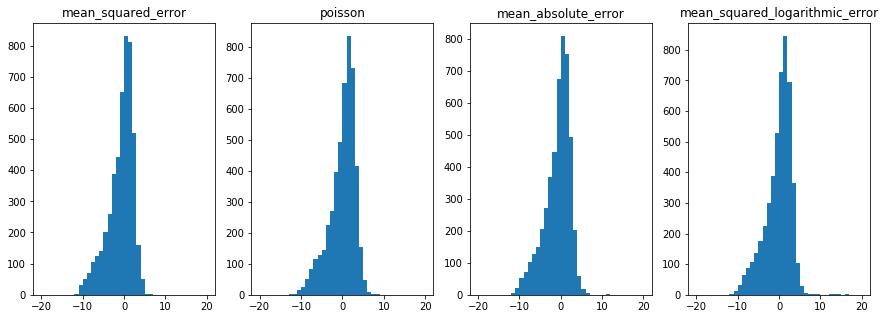

In [74]:
losses = ['mean_squared_error', 'poisson', 'mean_absolute_error', 'mean_squared_logarithmic_error']
rows = 1
fig, axes = plt.subplots(rows, len(losses) // rows, figsize=(15, 5))

for i, loss in zip(range(len(losses)), losses):
    get_diffs_distr(unscaled, get_custom_twol_m(unscaled, loss), axes[i], loss)

fig.savefig('loss_distribution.png')
fig.show()

Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 4s 186us/sample - loss: -1.5800 - val_loss: -2.2886
Last loss: 1048576, cur loss: [-2.288649065336905]
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 3s 166us/sample - loss: -2.2686 - val_loss: -2.4065
Last loss: [-2.288649065336905], cur loss: [-2.4064770728103384]
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 3s 152us/sample - loss: -2.3532 - val_loss: -2.3809
Last loss: [-2.4064770728103384], cur loss: [-2.3809062762201325]
Stopping...


array([ 1.37230015,  0.26045752, -4.18259168, ...,  0.89172935,
        2.50159311,  1.94000769])

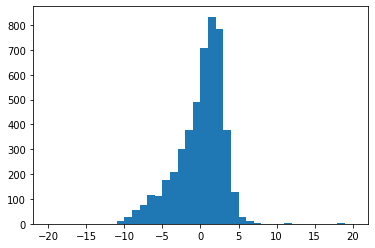

In [54]:
get_diffs_distr(unscaled, get_custom_twol_m(unscaled, 'poisson'))

Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 4s 213us/sample - loss: 2.4072 - val_loss: 2.3567
Last loss: 1048576, cur loss: [2.3567440336400813]
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 3s 181us/sample - loss: 2.2939 - val_loss: 2.3658
Last loss: [2.3567440336400813], cur loss: [2.3657718737263327]
Stopping...


array([ 1.11322403, -0.5717783 , -4.6657455 , ...,  0.85492873,
        1.49586201,  0.95352936])

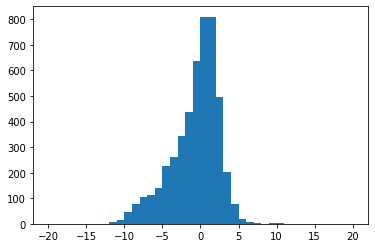

In [55]:
get_diffs_distr(unscaled, get_poisson_twol_m(unscaled, 'mean_absolute_error'))

Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 4s 193us/sample - loss: 1.8173 - val_loss: 1.7814
Last loss: 1048576, cur loss: [1.7813716118000755]
Train on 19358 samples, validate on 4840 samples
19358/19358 [==============================] - 3s 176us/sample - loss: 1.7029 - val_loss: 1.8387
Last loss: [1.7813716118000755], cur loss: [1.8387189065129304]
Stopping...


array([ 1.02071381,  0.51523781, -4.39254642, ...,  1.19220734,
        2.31702089,  1.58090591])

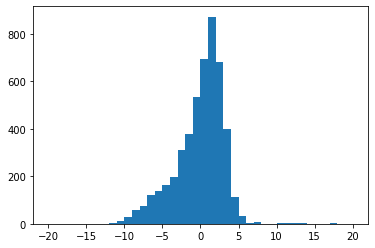

In [56]:
get_diffs_distr(unscaled, get_poisson_twol_m(unscaled, 'logcosh'))